In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance-dataset-simple-linear-regression/simplelinearregression.csv


In [2]:
df = pd.read_csv("/kaggle/input/insurance-dataset-simple-linear-regression/simplelinearregression.csv")
df.head()

,Age,Premium
0,18,10000
1,22,15000
2,23,18000
3,26,21000
4,28,24000


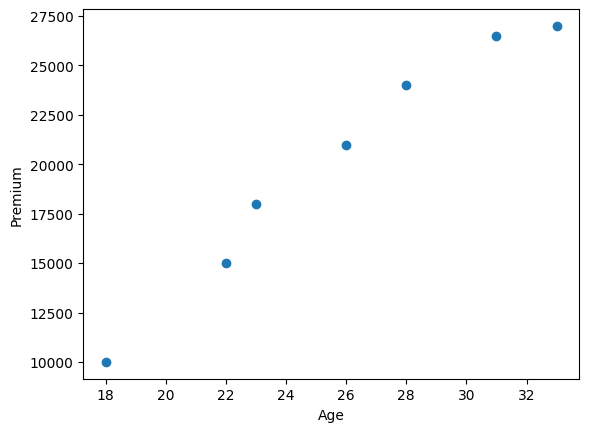

In [3]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'],df['Premium'])
plt.xlabel('Age')
plt.ylabel('Premium')
plt.show()

In [4]:
df.isnull().sum()

Age        0
Premium    0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
# train test split
from sklearn.model_selection import train_test_split

X = df[['Age']]
y = df['Premium']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Applying Simple Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
print("mean_squared_error: ",mean_squared_error(y_test, y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test, y_pred)))
print("r2_score: ",r2_score(y_test, y_pred))

mean_absolute_error:  3070.0636942675155
mean_squared_error:  9803085.317862792
RMSE:  3130.9879140397193
r2_score:  -0.5684936508580467


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


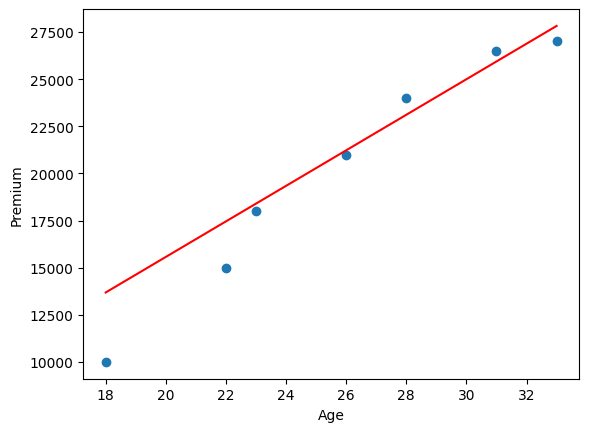

In [10]:
plt.scatter(df['Age'], df['Premium'])

# Create a smooth line across full x-range
x_line = np.linspace(df['Age'].min(), df['Age'].max(), 100)
y_line = lr.predict(x_line.reshape(-1, 1))

plt.plot(x_line, y_line, color='red')

plt.xlabel('Age')
plt.ylabel('Premium')
plt.show()